In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/anthonyschams/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/anthonyschams/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/anthonyschams/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/anthonyschams/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/anthonyschams/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompati

## Loops & Dictionaries (10 minutes)
Create a nested dictionary of recipes, with keys at the top level and dictionaries as their associated values.

1. Create an empty dictionary named `recipes`.
1. Add three dishes as the **keys** of your dictionary (e.g. 'meat pie')
1. For each key, the **value** should be another dictionary consisting of `ingredient: amount` pairs. (eg `'sugar': 'two cups'`) Each dish should have three ingredients.
1. Write a function to process the recipe dictionary. This function should loop through the recipes and return a single list of all ingredients for all recipes.

In [2]:
recipes = dict()
recipes['meat pie'] = {'meat': 'one pound', 'flour': 'two cups', 'butter': 'one stick'}
recipes['pizza'] = {'cheese': '8 oz', 'tomato sauce': 'one cup', 'flour': 'two cups'}
recipes['cheeseburger'] = {'cheese': '4 slices', 'beef': '12 oz', 'buns': '4 buns'}

In [9]:
def process_dict(dict_):
    ingredient_list = []
    for recipe in dict_:
        for  ingredient in dict_[recipe]:
            ingredient_list.append(ingredient)
    return ingredient_list

process_dict(recipes)

{'meat': 'one pound', 'flour': 'two cups', 'butter': 'one stick'}
{'cheese': '8 oz', 'tomato sauce': 'one cup', 'flour': 'two cups'}
{'cheese': '4 slices', 'beef': '12 oz', 'buns': '4 buns'}


['meat',
 'flour',
 'butter',
 'cheese',
 'tomato sauce',
 'flour',
 'cheese',
 'beef',
 'buns']

## Coding Readibility (5 Minutes)
Rewrite the code below in using best practices:
```python
def blabla():
for i in range ( 10 ):for j in range( 10 ):for k in range(10): print( i,j,k ) return everything
```

In [ ]:
def blabla():
    for i in range(10):
        for j in range(10):
            for k in range(10): 
                print(i,j,k) 
    return None

## Data cleaning (15 Minutes)
read data from http://rattle.togaware.com/weatherAUS.csv
1. Add a `day`, `month`, and `year` column (three new columns)
1. Print out the name of the columns where there are missing values
1. Drop all columns except `day`, `month`, `year`, `Rainfall`, and `Sunshine`
1. Fill all missing `Rainfall` values as follows:
  1. If `Sunshine` is over 7.0, set `Rainfall` = 0
  2. Else (including if `Sunshine is NaN`) set `Rainfall` to the mean `Rainfall` value.

In [11]:
AUS = pd.read_csv('http://rattle.togaware.com/weatherAUS.csv')

In [29]:
na_cols = AUS.isna().sum() > 0
AUS.columns[na_cols]

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [39]:
AUS['year'] = AUS.Date.apply(lambda x: x[:4]).astype(int)
AUS['month'] = AUS.Date.apply(lambda x: x[5:7]).astype(int)
AUS['day'] = AUS.Date.apply(lambda x: x[9:]).astype(int)

In [40]:
AUS[['year', 'month', 'day']].head()

,year,month,day
0,2008,12,1
1,2008,12,2
2,2008,12,3
3,2008,12,4
4,2008,12,5


In [43]:
AUS.drop(['Date', 'Location', 'MinTemp', 'MaxTemp','Evaporation','WindGustDir', 
          'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
          'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
          'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
          'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
         axis=1,
         inplace=True)

In [46]:
AUS.head()

,Rainfall,Sunshine,year,month,day
0,0.6,NaN,2008,12,1
1,0.0,NaN,2008,12,2
2,0.0,NaN,2008,12,3
3,0.0,NaN,2008,12,4
4,1.0,NaN,2008,12,5


In [48]:
AUS2 = AUS.copy()
avg_rainfall = AUS.Rainfall.mean()

In [68]:
def clean_rain(row, avg_rainfall=0):
    if row['Rainfall'] == np.nan:    
        if row['Sunshine'] > 7.0: return 0
        else: return avg_rainfall
    else: return row['Rainfall']

In [69]:
AUS.apply(clean_rain, axis=1)

0          0.6
1          0.0
2          0.0
3          0.0
4          1.0
5          0.2
6          0.0
7          0.0
8          0.0
9          1.4
10         0.0
11         2.2
12        15.6
13         3.6
14         0.0
15         NaN
16         0.0
17        16.8
18        10.6
19         0.0
20         0.0
21         0.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         1.2
          ... 
157314     0.0
157315     0.0
157316     0.0
157317     0.0
157318     0.0
157319     0.0
157320     0.0
157321     0.0
157322     0.0
157323     0.0
157324     0.0
157325     0.0
157326     0.0
157327     0.0
157328     0.0
157329     0.0
157330     0.0
157331     0.0
157332     0.0
157333     0.0
157334     0.0
157335     0.0
157336     0.0
157337     0.0
157338     0.0
157339     0.0
157340     0.0
157341     0.0
157342     0.0
157343     0.0
Length: 157344, dtype: float64

## Visualization (15 Minutes)

As best you can, recreate this bar chart created in Google Sheets using Python.  You may use Matplotlib, Seaborn, or any other graphing library you came across.
<img src="chart.jpg" alt="chart to recreate" width="500"/>

In [25]:
df = pd.DataFrame([54, 23, 99, 37, 3], index=['A', 'B', 'C', 'D', 'E']).iloc[::-1]

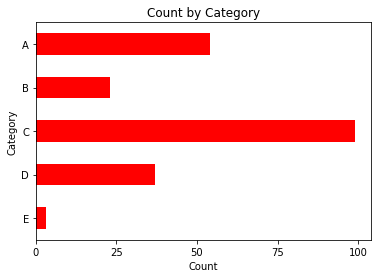

In [41]:
df.plot(kind='barh', color='r', sort_columns=True)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Count by Category')
plt.xticks([0, 25, 50, 75, 100])
plt.legend().remove()

## Github (5 Minutes)

Follow the instructions at https://github.com/enkeboll/fis-dc-ds-060319-gifs, and make sure to check your email to confirm your collaborator status!

# Assessment submission (2 Minutes)
Please save this file as `firstname.ipynb` and upload it using [this form](https://docs.google.com/forms/d/e/1FAIpQLSdlnMgc5Nb5uFTmw7DiScapevg-VA8DQdiFeIAil5sZqYZbFA/viewform)